In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # eğitim ve test ayrımı
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # normalizasyon için
from sklearn.impute import SimpleImputer # eksik veriler için
from sklearn.preprocessing import LabelEncoder # kategorik veriler için
from sklearn.preprocessing import OneHotEncoder # kategorik verilerin vektör olarak temsili
import missingno as msno # null olan değerlerin grafiği için
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_auc_score,roc_curve, precision_score, recall_score, f1_score, auc
from yellowbrick.classifier import ConfusionMatrix
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# Classifier için kullanılacak modüller 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering

# Prediction için kullanılacak modüller
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import SpectralClustering


## Veri Önişleme

In [4]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.drop("id", inplace = True, axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
# stats of categorical data
data.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [10]:
# data.profile_report()

## Eksik Verilerin Doldurulması

In [11]:
data["bmi"].replace(to_replace=np.NaN, value=data["bmi"].mean(), inplace=True)


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


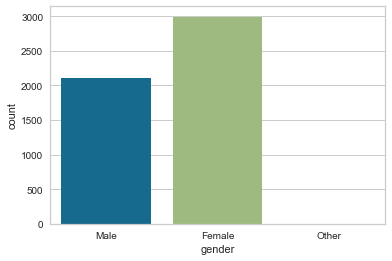

In [12]:
print(data["gender"].value_counts())
sns.countplot(x = "gender", data = data);

Yes    3353
No     1757
Name: ever_married, dtype: int64


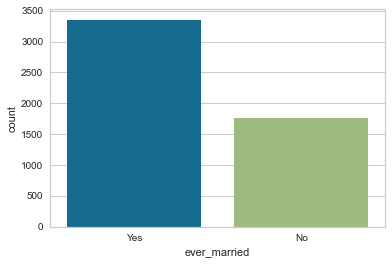

In [13]:
print(data["ever_married"].value_counts())
sns.countplot(x ="ever_married", data = data);

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


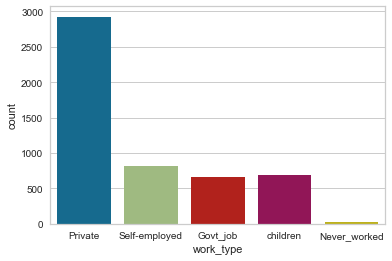

In [14]:
print(data["work_type"].value_counts())
sns.countplot(x ="work_type", data = data);

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


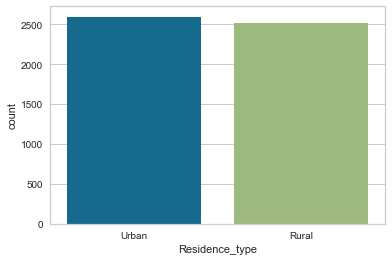

In [15]:
print(data["Residence_type"].value_counts())
sns.countplot(x ="Residence_type", data = data);

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


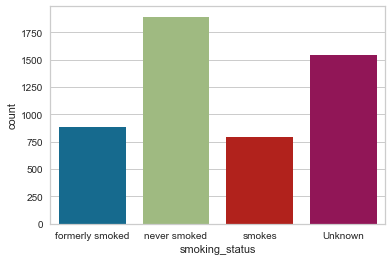

In [16]:
print(data["smoking_status"].value_counts())
sns.countplot(x ="smoking_status", data = data);

0    4861
1     249
Name: stroke, dtype: int64


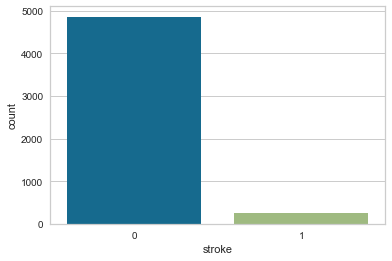

In [17]:
print(data["stroke"].value_counts())
sns.countplot(x ="stroke", data = data);

# Object Tipinin Label Encoder İle Dönüşümü

In [18]:
le = LabelEncoder()

data["gender"] = le.fit_transform(data["gender"])
d_gender = dict(zip(le.classes_, le.transform(le.classes_)))

data["ever_married"] = le.fit_transform(data["ever_married"])
d_ever_married = dict(zip(le.classes_, le.transform(le.classes_)))

data["work_type"] = le.fit_transform(data["work_type"])
d_work_type = dict(zip(le.classes_, le.transform(le.classes_)))

data["Residence_type"] = le.fit_transform(data["Residence_type"])
d_Residence_type = dict(zip(le.classes_, le.transform(le.classes_)))

data["smoking_status"] = le.fit_transform(data["smoking_status"])
d_smoking_status = dict(zip(le.classes_, le.transform(le.classes_)))


In [19]:
print(d_gender)
print(d_ever_married)
print(d_work_type)
print(d_Residence_type)
print(d_smoking_status)

{'Female': 0, 'Male': 1, 'Other': 2}
{'No': 0, 'Yes': 1}
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
{'Rural': 0, 'Urban': 1}
{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


# Bağımlı Bağımsız Değişkenlerin Ayrılması

In [20]:
x = data.iloc[:, :-1].values # bağımsız değişkenler
y = data.iloc[:, -1:].values # bağımlı değişkenler

## Verilerin Eğitim ve Test için Bölünmesi

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [22]:
pd.DataFrame(y_test).value_counts()

0    1464
1      69
dtype: int64

# Verilerin Ölçeklenmesi

In [23]:
sc = StandardScaler()
x_olcekli_train = sc.fit_transform(x_train)
x_olcekli_test = sc.transform(x_test)

y_olcekli_train = sc.fit_transform(y_train)
y_olcekli_test = sc.transform(y_train)


In [24]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (3577, 10)
x_test shape: (1533, 10)
y_train shape: (3577, 1)
y_test shape: (1533, 1)


In [25]:
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train == 0)))


Before OverSampling, counts of label 1: [180]
Before OverSampling, counts of label 0: [3397] 



In [26]:
sm = SMOTE(random_state=2)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_sm.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_sm == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_sm == 0)))

After OverSampling, the shape of train_x: (6794, 10)
After OverSampling, the shape of train_y: (6794,)
After OverSampling, counts of label 1: 3397
After OverSampling, counts of label 0: 3397


# Model Selection

In [27]:
# models = []
# models.append(['XGBRegressor', XGBRegressor(learning_rate=0.1,
#               objective='binary:logistic', random_state=0, eval_metric='mlogloss')])
# models.append(['Logistic Regression', LogisticRegression(random_state=0)])
# models.append(['SVM', SVR()])
# models.append(['KNeigbors', KNeighborsRegressor()])
# models.append(['GaussianNB', GaussianNB()])
# models.append(['BernoulliNB', BernoulliNB()])
# models.append(['DecisionTree', DecisionTreeRegressor(random_state=0)])
# models.append(['RandomForest', RandomForestRegressor(random_state=0)])
# models.append(['AdaBoostRegressor', AdaBoostRegressor()])
# models.append(['MLPRegressor', MLPRegressor()])
# models.append(['CatBoostRegressor', CatBoostRegressor()])
# models.append(['LGBMRegressor', LGBMRegressor()])
# models.append(['GradientBoostingRegressor', GradientBoostingRegressor()])


models = []
models.append(['XGBClassifier', XGBClassifier(learning_rate=0.1,
              objective='binary:logistic', random_state=0, eval_metric='mlogloss')])
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC()])
models.append(['KNeigbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['DecisionTree', DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest', RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier()])
models.append(['MLPClassifier', MLPClassifier()])
models.append(['CatBoostClassifier', CatBoostClassifier()])
models.append(['LGBMClassifier', LGBMClassifier()])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])


In [28]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(x_train_sm, y_train_sm)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator=model, X=x_train_sm, y=y_train_sm, cv=10)
    roc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(models[m][0], ':')
    print('Confusion Matrix:\n', cm)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
    print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('Precision: {:.2f} %'.format(precision))
    print('Recall: {:.2f} %'.format(recall))
    print('F1 Score: {:.2f} %'.format(f1))
    print('*' * 40)

    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test, y_pred) * 100)
    lst_2.append(accuracies.mean() * 100)
    lst_2.append(accuracies.std() * 100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


XGBClassifier :
Confusion Matrix:
 [[1457    7]
 [  67    2]]
Accuracy Score:  0.9517286366601435
K-Fold Validation Mean Accuracy: 96.87 %
Standard Deviation: 7.49 %
ROC AUC Score: 0.51 %
Precision: 0.22 %
Recall: 0.03 %
F1 Score: 0.05 %
****************************************
Logistic Regression :
Confusion Matrix:
 [[1061  403]
 [  10   59]]
Accuracy Score:  0.730593607305936
K-Fold Validation Mean Accuracy: 76.80 %
Standard Deviation: 1.32 %
ROC AUC Score: 0.79 %
Precision: 0.13 %
Recall: 0.86 %
F1 Score: 0.22 %
****************************************
SVM :
Confusion Matrix:
 [[967 497]
 [  6  63]]
Accuracy Score:  0.6718851924331376
K-Fold Validation Mean Accuracy: 76.79 %
Standard Deviation: 1.09 %
ROC AUC Score: 0.79 %
Precision: 0.11 %
Recall: 0.91 %
F1 Score: 0.20 %
****************************************
KNeigbors :
Confusion Matrix:
 [[1156  308]
 [  26   43]]
Accuracy Score:  0.7821265492498369
K-Fold Validation Mean Accuracy: 89.11 %
Standard Deviation: 0.75 %
ROC AUC Sc

In [29]:
df_col = pd.DataFrame(lst_1, columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df_col.sort_values(by = ["Accuracy", "K-Fold Mean Accuracy"], inplace=True, ascending=False)
df_col


,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
7,RandomForest,95.368558,97.087780,7.171988,0.520031,0.375000,0.043478,0.077922
0,XGBClassifier,95.172864,96.867106,7.490901,0.512102,0.222222,0.028986,0.051282
10,CatBoostClassifier,95.042401,96.881833,7.494875,0.518324,0.230769,0.043478,0.073171
11,LGBMClassifier,94.585780,96.793533,7.518196,0.509028,0.111111,0.028986,0.045977
12,GradientBoostingClassifier,94.520548,96.499047,7.663662,0.508687,0.105263,0.028986,0.045455
8,AdaBoostClassifier,94.194390,95.277181,7.418026,0.541503,0.205882,0.101449,0.135922
6,DecisionTree,90.084801,94.364225,5.504980,0.582131,0.139130,0.231884,0.173913
9,MLPClassifier,84.735812,80.247076,1.563820,0.740556,0.171315,0.623188,0.268750
3,KNeigbors,78.212655,89.108204,0.745419,0.706403,0.122507,0.623188,0.204762
1,Logistic Regression,73.059361,76.802997,1.319402,0.789900,0.127706,0.855072,0.222222


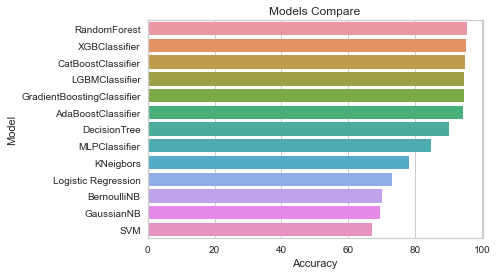

In [30]:
sns.barplot(x = "Accuracy", y= "Model", data=df_col)
plt.title("Models Compare");

# Model Tuning


In [31]:
grid_models = [
    (XGBClassifier(), [
     {'learning_rate': [0.01, 0.05, 0.1],
      'eval_metric': ['error'],
    #   'max_depth': [1, 2, 3, 4, 5],
      'n_estimators': [100, 500, 1000]
      }
     ]),
    # (AdaBoostClassifier(), [
    #     {'n_estimators': [10, 50, 100, 500, 1000, 5000],
    #      'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    #      'algorithm': ['SAMME', 'SAMME.R']}
    # ]),
    # (RandomForestClassifier(), [
    #     {'n_estimators': [100, 150, 200],
    #      'criterion':['gini', 'entropy'],
    #      'random_state':[0]}
    # ])
]


In [32]:
for model, params in grid_models:
    grid = GridSearchCV(estimator=model, param_grid=params,
                        scoring="accuracy", cv=10, n_jobs=-1)
    grid.fit(x_train_sm, y_train_sm)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(f"{model}\n Best Accuracy: {best_accuracy * 100}")
    print(f"Best Params: {best_param}")
    print("*" * 40)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
 Best Accuracy: 96.91126656848306
Best Params: {'eval_metric': 'error', 'learning_rate': 0.01, 'n_estimators': 1000}
****************************************


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1464
           1       0.22      0.03      0.05        69

    accuracy                           0.95      1533
   macro avg       0.59      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533

ROC AUC score: 0.8054070642274491
Accuracy Score:  0.9517286366601435


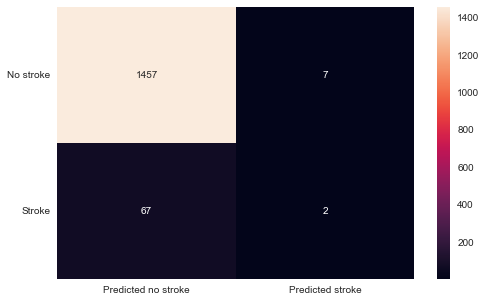

Text(0.5, 0, 'False Positive Rate')

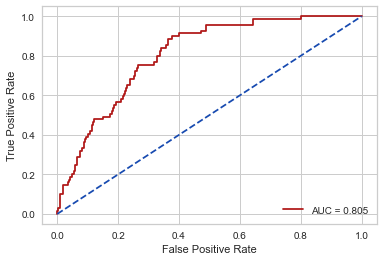

In [33]:
classifier = XGBClassifier(eval_metric='error', learning_rate=0.1)
classifier.fit(x_train_sm, y_train_sm)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', 
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate,
         color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [44]:
y_pred_values = pd.DataFrame(y_pred).value_counts()
y_pred_values

0    1524
1       9
dtype: int64

In [45]:
y_test_values = pd.DataFrame(y_test).value_counts()
y_test_values

0    1464
1      69
dtype: int64

In [57]:
hasta_olma_yuzdesi = (y_test_values[1] / ( y_test_values[0] +  y_test_values[1])) * 100
saglikli_olma_yuzdesi = (y_test_values[0] / ( y_test_values[0] +  y_test_values[1])) * 100

pred1 = classifier.predict(np.array([1, 81, 0, 0, 1, 2, 1, 186.21, 29, 1]).reshape((1, -1))) # 1 
if pred1 == 1:
    print(100 - hasta_olma_yuzdesi, " ihtimalle hastasınız")


pred2 = classifier.predict(np.array([0, 59, 0, 0, 1, 2, 1, 81.51, 25.6, 1]).reshape((1, -1))) # 0
if pred2 == 0:
    print(saglikli_olma_yuzdesi, " ihtimalle sağlıklısınız")


95.49902152641879  ihtimalle hastasınız
95.49902152641879  ihtimalle sağlıklısınız
